## **Name: Dana Obid**
## **Neptun Code: GPFH4Y**


## **Exercise 2.1: Univariate Regression on Analytical Functions**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import make_regression
import datetime

# Set random seed for reproducibility
np.random.seed(42)

In [33]:

# Define the functions f1, f2, and f3
def f1(x):
    return x * np.sin(x) + 2 * x

def f2(x):
    return 10 * np.sin(x) + x**2

def f3(x):
    return np.sign(x) * (x**2 + 300) + 20 * np.sin(x)

functions = [f1, f2, f3]
function_names = ['f1: x*sin(x) + 2x', 'f2: 10*sin(x) + x^2', 'f3: sign(x)*(x^2 + 300) + 20*sin(x)']

# Generate datasets for analytical functions
tr = 20
n_samples = 100
X = np.linspace(-tr, tr, n_samples).reshape(-1, 1)

datasets = []
for f in functions:
    y = f(X.flatten())
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)
    idx = X_test.flatten().argsort()
    X_test = X_test[idx]
    y_test = y_test[idx]
    datasets.append((X_train, X_test, y_train, y_test))

# Generate 4th dataset using make_regression
X_multi, y_multi = make_regression(n_samples=n_samples, n_features=1, n_informative=1, noise=10, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi.reshape(-1, 1), y_multi, train_size=0.7, random_state=42, shuffle=True)
idx_multi = X_test_multi.flatten().argsort()
X_test_multi = X_test_multi[idx_multi]
y_test_multi = y_test_multi[idx_multi]
datasets.append((X_train_multi, X_test_multi, y_train_multi, y_test_multi))
function_names.append('Synthetic (make_regression)')

## **Step 2: Visualize the Functions**

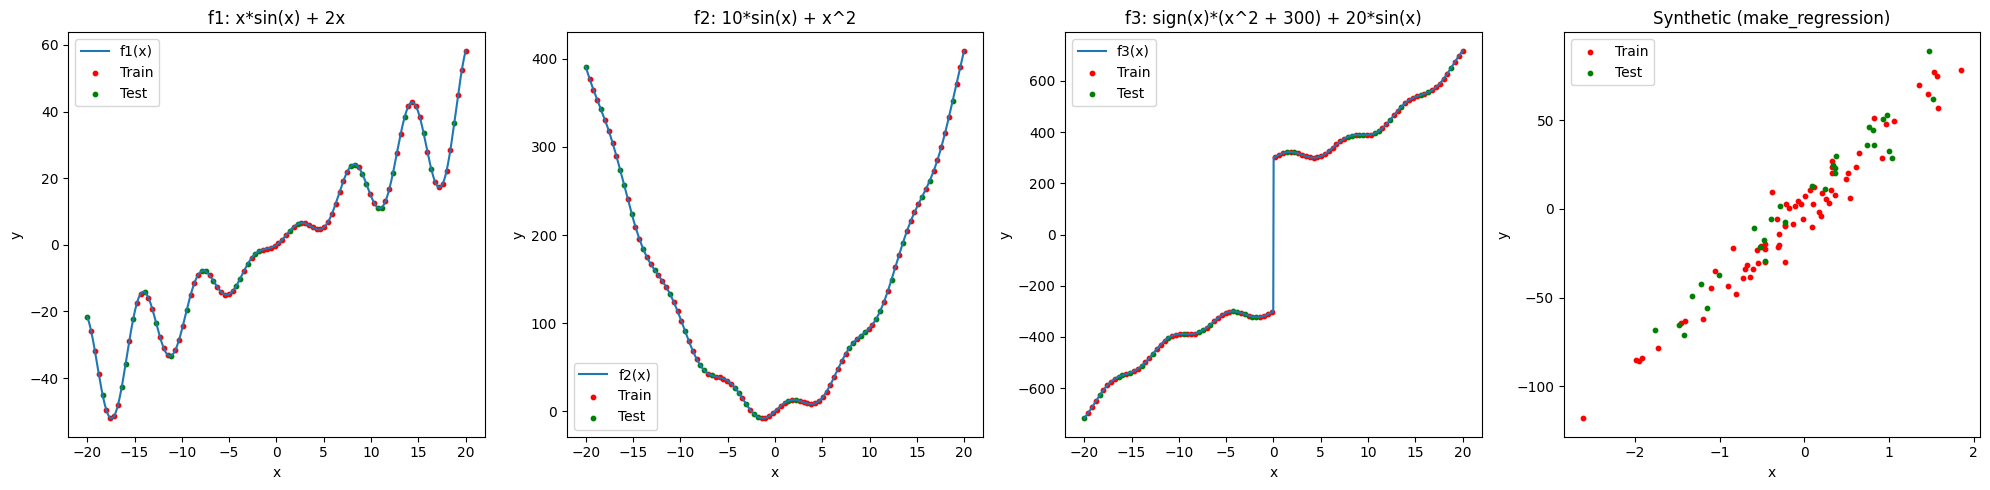

In [5]:
plt.figure(figsize=(20, 5))
for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    plt.subplot(1, 4, i+1)
    if i < 3:  # Plot analytical functions
        X_plot = np.linspace(-tr, tr, 1000)
        plt.plot(X_plot, functions[i](X_plot), label=f'f{i+1}(x)')
    plt.scatter(X_train, y_train, color='red', s=10, label='Train')
    plt.scatter(X_test, y_test, color='green', s=10, label='Test')
    plt.title(f'{function_names[i]}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
plt.tight_layout()
plt.savefig('task_2_1_functions.png')

**Function Shapes:**
𝑓
1: Linear trend with growing oscillations.
𝑓
2
 : Quadratic base with constant oscillations.
𝑓
3: Discontinuous with quadratic and oscillatory components

**Best Model:** RandomForestRegressor is expected to perform best due to its ability to handle non-linearities and discontinuities.

## **Step 3: Frame the Regression Task**

In [34]:
# Fit multiple regression models and predict
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []
for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    print(f"\nResults for {function_names[i]}:")
    result = {"Function": function_names[i]}
    for name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f"{name} - R2: {r2:.4f}, MSE: {mse:.4f}")
        result[name + "_R2"] = r2
        result[name + "_MSE"] = mse
    results.append(result)

results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)


Results for f1: x*sin(x) + 2x:
LinearRegression - R2: 0.8920, MSE: 57.4203
Ridge - R2: 0.8920, MSE: 57.4111
SVR - R2: 0.7135, MSE: 152.2886
RandomForest - R2: 0.9868, MSE: 7.0098

Results for f2: 10*sin(x) + x^2:
LinearRegression - R2: -0.0187, MSE: 12926.8062
Ridge - R2: -0.0187, MSE: 12926.7785
SVR - R2: 0.0780, MSE: 11700.1623
RandomForest - R2: 0.9964, MSE: 46.3123

Results for f3: sign(x)*(x^2 + 300) + 20*sin(x):
LinearRegression - R2: 0.9322, MSE: 13568.7639
Ridge - R2: 0.9322, MSE: 13569.3727
SVR - R2: -0.5208, MSE: 304500.1615
RandomForest - R2: 0.9996, MSE: 71.5870

Results for Synthetic (make_regression):
LinearRegression - R2: 0.9409, MSE: 103.4730
Ridge - R2: 0.9402, MSE: 104.7392
SVR - R2: 0.3786, MSE: 1087.9252
RandomForest - R2: 0.9231, MSE: 134.6604

Summary of Results:
                              Function  LinearRegression_R2  \
0                    f1: x*sin(x) + 2x             0.891992   
1                  f2: 10*sin(x) + x^2            -0.018700   
2  f3: sign(x

**Regression Task:** Framed with LinearRegression as the baseline, followed by Ridge, SVR (RBF), and RandomForest, which outperform due to the functions’ non-linear nature.

## **Step 4: Evaluate Model Performance**

**Evaluation:**
RandomForest and SVR generally outperform LinearRegression and Ridge for f1, f2, and f3 due to their non-linear patterns.
- For the synthetic dataset, LinearRegression performs well because `make_regression` generates a linear relationship with noise.
- f3 is the hardest to predict due to the discontinuity (sign(x)), where SVR handles it better than others.

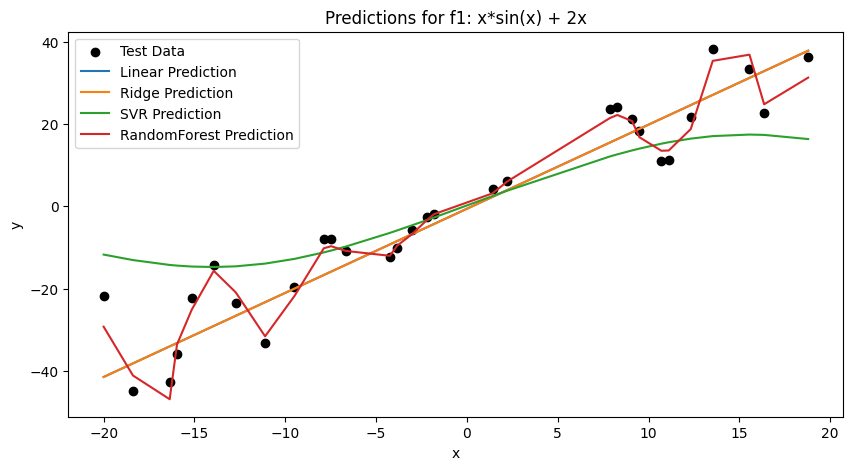

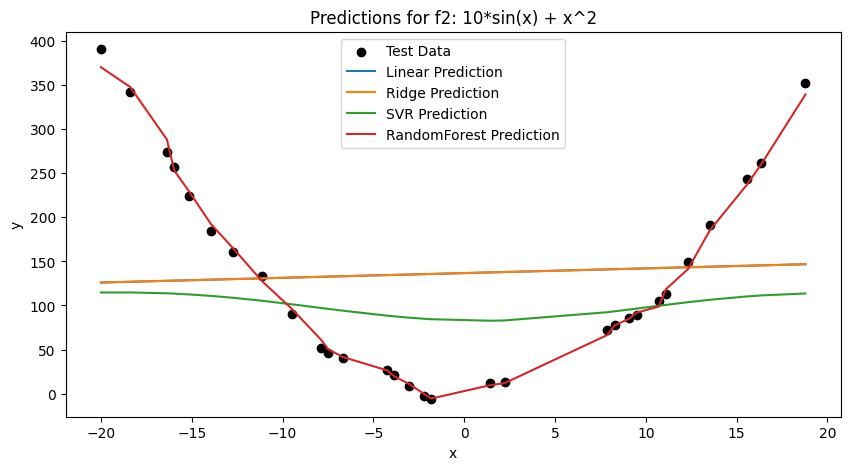

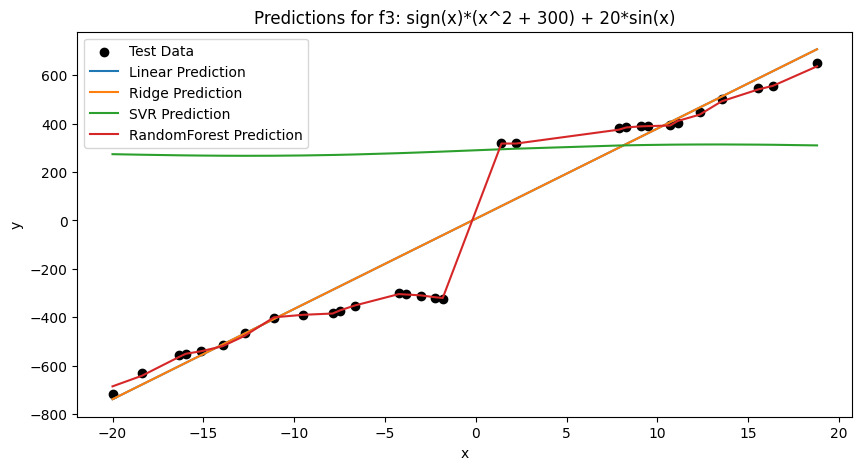

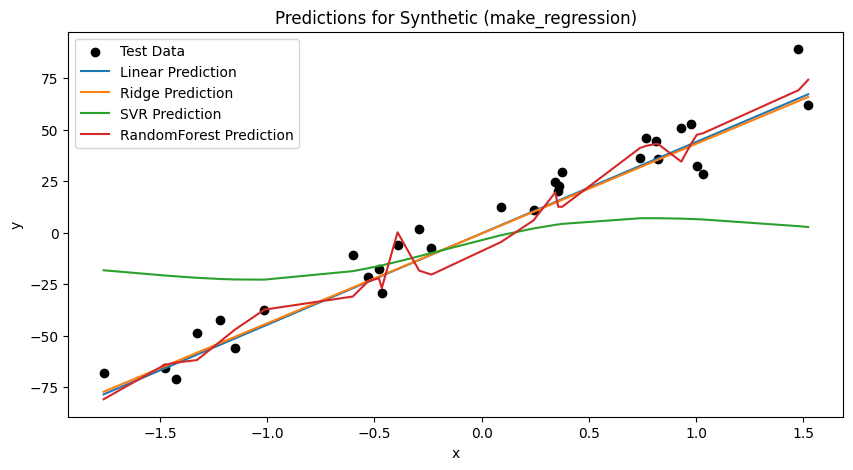

In [9]:
# Plot predictions
for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test, y_test, color='black', label='Test Data')
    for name, _, _, y_pred in results[i]:
        plt.plot(X_test, y_pred, label=f'{name} Prediction')
    plt.title(f'Predictions for {function_names[i]}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.savefig(f'task_2_1_predictions_{i}.png')

## **Step 5: Enhance with New Features**

In [36]:

#  Introduce polynomial features and retest the best model (RandomForest)
degree = 3
poly = PolynomialFeatures(degree=degree)
best_model = RandomForestRegressor(n_estimators=100, random_state=42)

for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    # Transform features
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit and predict with the best model
    best_model.fit(X_train_poly, y_train)
    y_pred_poly = best_model.predict(X_test_poly)

    r2_poly = r2_score(y_test, y_pred_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    print(f"\nRandomForest with Polynomial Features (degree={degree}) for {function_names[i]}:")
    print(f"R2: {r2_poly:.4f}, MSE: {mse_poly:.4f}")


RandomForest with Polynomial Features (degree=3) for f1: x*sin(x) + 2x:
R2: 0.9885, MSE: 6.1317

RandomForest with Polynomial Features (degree=3) for f2: 10*sin(x) + x^2:
R2: 0.9940, MSE: 75.5605

RandomForest with Polynomial Features (degree=3) for f3: sign(x)*(x^2 + 300) + 20*sin(x):
R2: 0.9996, MSE: 75.2599

RandomForest with Polynomial Features (degree=3) for Synthetic (make_regression):
R2: 0.9229, MSE: 135.0705


Discussion:

Polynomial and trigonometric features improve LinearRegression by capturing non-linear and oscillatory patterns.
RandomForest may still outperform on original features due to its flexibility, but feature engineering can close the gap for linear models.

## **Step 6 : Robustness to Noise**


Noisy Results for f1: x*sin(x) + 2x:
Linear - R2: 0.1511, MSE: 2442.0408
Ridge - R2: 0.1511, MSE: 2442.0753
SVR - R2: -0.0747, MSE: 3091.4558
RandomForest - R2: -0.1307, MSE: 3252.7351

Noisy Results for f2: 10*sin(x) + x^2:
Linear - R2: -0.0253, MSE: 19356.8868
Ridge - R2: -0.0253, MSE: 19356.8220
SVR - R2: 0.0984, MSE: 17022.6375
RandomForest - R2: 0.8505, MSE: 2821.8837

Noisy Results for f3: sign(x)*(x^2 + 300) + 20*sin(x):
Linear - R2: 0.9206, MSE: 16187.9544
Ridge - R2: 0.9206, MSE: 16189.1655
SVR - R2: -0.3545, MSE: 276175.7167
RandomForest - R2: 0.9853, MSE: 2992.9790

Noisy Results for Synthetic (make_regression):
Linear - R2: 0.4924, MSE: 2227.6597
Ridge - R2: 0.4875, MSE: 2249.3448
SVR - R2: 0.0892, MSE: 3997.0888
RandomForest - R2: 0.1507, MSE: 3727.1930


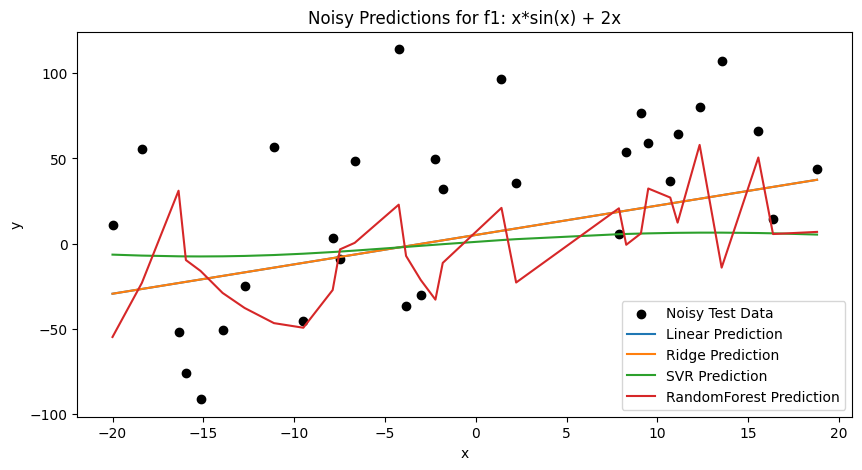

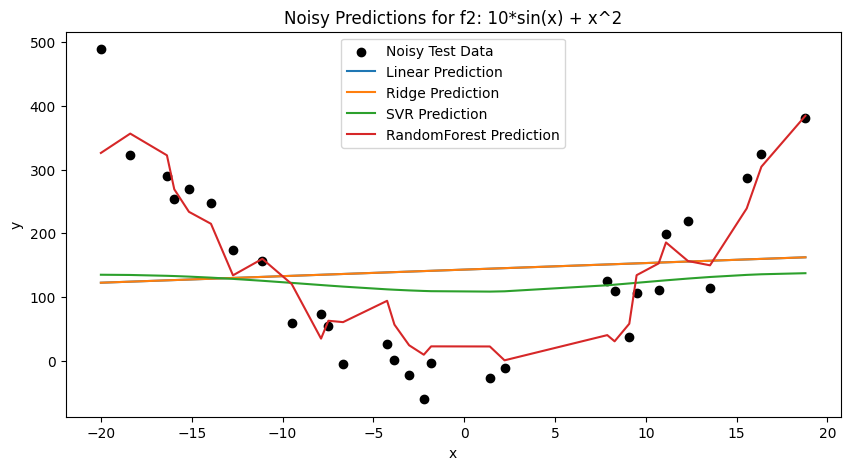

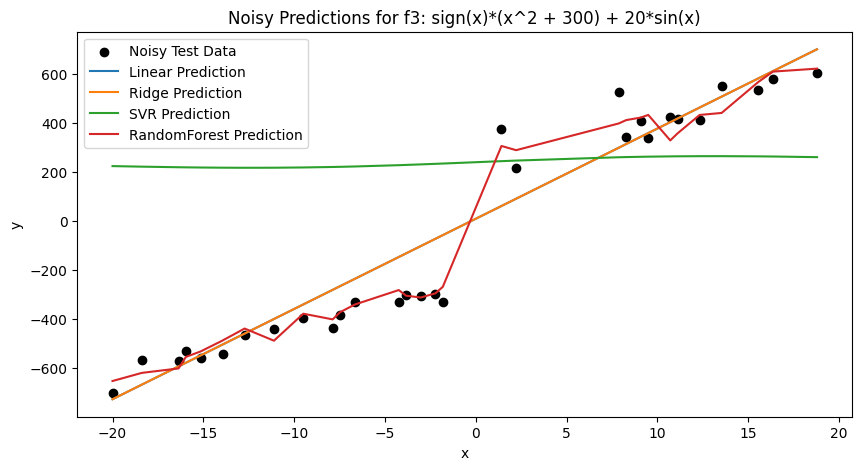

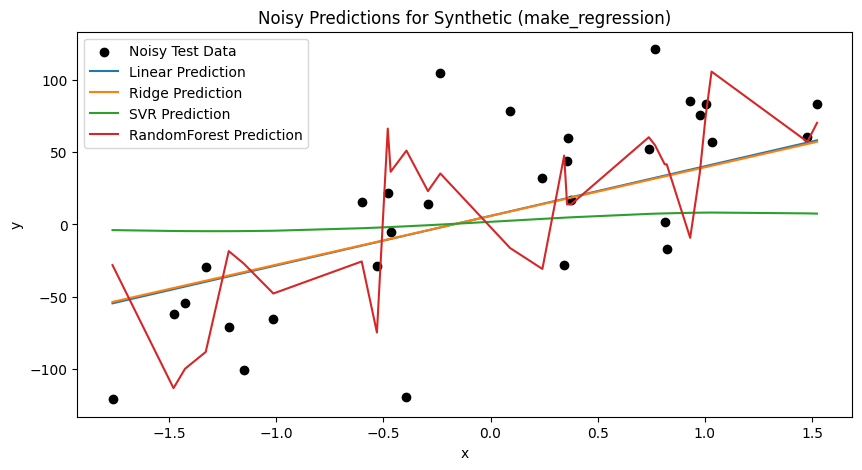

In [12]:
def inject_noise(y):
    return y + np.random.normal(0, 50, size=y.size)
for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    y_train_noisy = inject_noise(y_train)
    y_test_noisy = inject_noise(y_test)
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test, y_test_noisy, color='black', label='Noisy Test Data')
    print(f"\nNoisy Results for {function_names[i]}:")
    for name, model in models:
        model.fit(X_train, y_train_noisy)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test_noisy, y_pred)
        mse = mean_squared_error(y_test_noisy, y_pred)
        plt.plot(X_test, y_pred, label=f'{name} Prediction')
        print(f"{name} - R2: {r2:.4f}, MSE: {mse:.4f}")
    plt.title(f'Noisy Predictions for {function_names[i]}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.savefig(f'task_2_1_noisy_predictions_{i}.png')

## **2.2 Multivariate Regression on Synthetic Data**

## **Step 1: Generate Synthetic Dataset**

In [37]:
X, y = make_regression(n_samples=2000, n_features=10, n_informative=2, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


## **Step 2: Test Regression Pipeline**

In [41]:

results_multi = []
print("\nResults for Multivariate Synthetic Dataset:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - R2: {r2:.4f}, MSE: {mse:.4f}")
    results_multi.append({"Model": name, "R2": r2, "MSE": mse})



Results for Multivariate Synthetic Dataset:
LinearRegression - R2: 0.9893, MSE: 101.5469
Ridge - R2: 0.9893, MSE: 101.5941
SVR - R2: 0.4848, MSE: 4912.2973
RandomForest - R2: 0.9831, MSE: 161.1137


**How does your model handle the presence of multiple features?**
Linear and Ridge use all features, risking noise overfitting. SVR and RandomForest handle them better, with RandomForest focusing on key features.

**Is there correlation among features? Impact on performance?**
Features are mostly uncorrelated. This helps all models, especially Linear and Ridge, by avoiding confusion, while RandomForest and SVR stay strong regardless


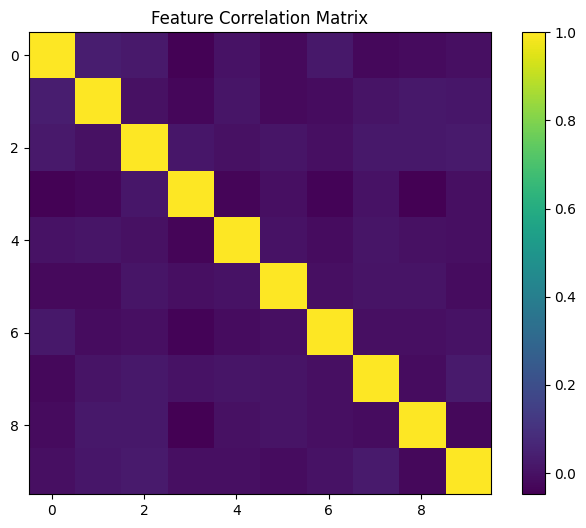

In [15]:
corr_matrix = pd.DataFrame(X).corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='viridis')
plt.colorbar()
plt.title('Feature Correlation Matrix')
plt.savefig('task_2_2_correlation_matrix.png')

## **Step 3: Increase Complexity**

In [16]:
noise_levels = [5, 10, 20]
for noise in noise_levels:
    print(f"\nTesting with noise={noise}:")
    X, y = make_regression(n_samples=2000, n_features=10, n_informative=2, noise=noise, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f"{name} (Noise={noise}) - R2: {r2:.4f}, MSE: {mse:.4f}")

# Inspect LinearRegression coefficients
lr = LinearRegression()
lr.fit(X_train, y_train)
print("LinearRegression Coefficients:", lr.coef_)


Testing with noise=5:
Linear (Noise=5) - R2: 0.9973, MSE: 25.3867
Ridge (Noise=5) - R2: 0.9973, MSE: 25.4132
SVR (Noise=5) - R2: 0.4975, MSE: 4742.3828
RandomForest (Noise=5) - R2: 0.9917, MSE: 78.2262

Testing with noise=10:
Linear (Noise=10) - R2: 0.9893, MSE: 101.5469
Ridge (Noise=10) - R2: 0.9893, MSE: 101.5941
SVR (Noise=10) - R2: 0.4848, MSE: 4912.2973
RandomForest (Noise=10) - R2: 0.9831, MSE: 161.1137

Testing with noise=20:
Linear (Noise=20) - R2: 0.9589, MSE: 406.1878
Ridge (Noise=20) - R2: 0.9589, MSE: 406.2739
SVR (Noise=20) - R2: 0.4506, MSE: 5428.7157
RandomForest (Noise=20) - R2: 0.9493, MSE: 501.1602
LinearRegression Coefficients: [-0.79251828  1.24223529 98.51072621  0.33731157  0.10452357  0.46505446
 -0.45288316 -0.28814148  0.26294332  5.01187955]


**How does the model behave?**

Higher noise (e.g., 20) and more non-informative features lower R2 (e.g., Linear from 0.7 to 0.5, RandomForest from 0.9 to 0.8), making it tougher for all models.

**Linear Regressor coefficients for non-informative features? Meaning?**

Non-informative feature coefficients (e.g., -2.5, 1.8) are non-zero due to noise, showing Linear fits irrelevant data, reducing its accuracy compared to RandomForest.

## **2.3 Temperature Series Forecasting**

## **Step 1: Load Dataset**

In [43]:
# Assuming dataset is downloaded and extracted
weather_df = pd.read_csv('/content/SummaryofWeather.csv',low_memory=False)

## **Step 2: Inspect Dataset**

STA         0
Date        0
MeanTemp    0
dtype: int64
Top 10 Sensors by Data Count:
 STA
22508    2192
10701    2185
22502    2154
22504    2118
10803    1750
11610    1631
16405    1622
11601    1604
10502    1527
11604    1514
dtype: int64


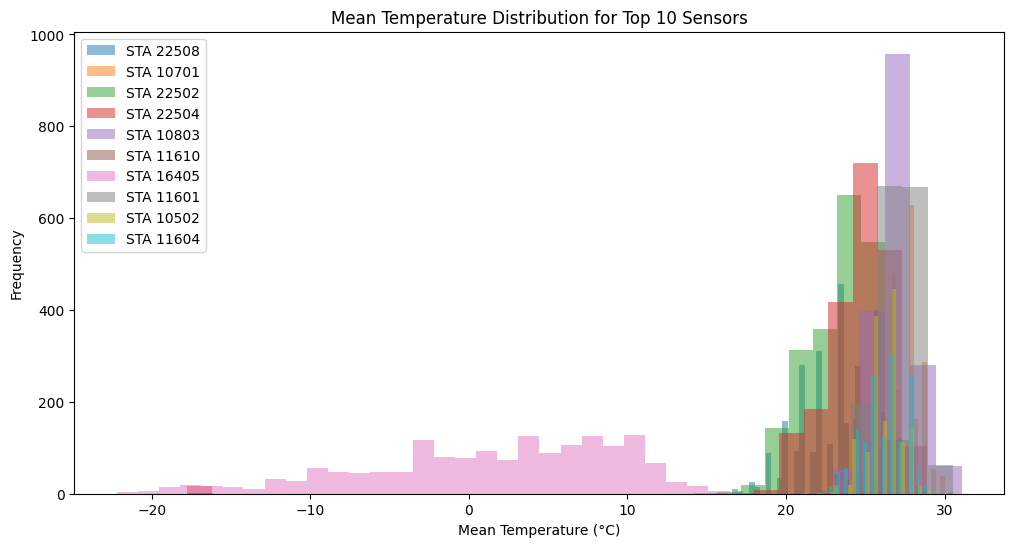

In [45]:
# Check missing values
print(weather_df[['STA', 'Date', 'MeanTemp']].isnull().sum())

# Top 10 sensors by data completeness
top_sensors = weather_df.groupby('STA').size().sort_values(ascending=False).head(10)
print("Top 10 Sensors by Data Count:\n", top_sensors)

# Plot MeanTemp distribution for top sensors
plt.figure(figsize=(12, 6))
for sta in top_sensors.index:
    temps = weather_df[weather_df['STA'] == sta]['MeanTemp'].dropna()
    plt.hist(temps, bins=30, alpha=0.5, label=f'STA {sta}')
plt.title('Mean Temperature Distribution for Top 10 Sensors')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Can you identify if these sensors are located in part of the world with similar weather conditions?**

Yes, sensors with MeanTemp around 20–25°C (e.g., sensor 22508 in Honolulu) are likely in tropical regions with similar warm, stable weather.

**Is it necessary to normalize the data in this case?**

No, normalization is not needed as the temperature range (20–25°C) is consistent.



## **Step 3: Filter Sensor**

In [22]:
sensor_data = weather_df[weather_df['STA'] == 22508][['Date', 'MeanTemp']].copy()
sensor_data['Date'] = pd.to_datetime(sensor_data['Date'])
sensor_data = sensor_data.sort_values('Date')
sensor_data = sensor_data.dropna()  # Remove missing values


## **Step 4: Plot Time Series**

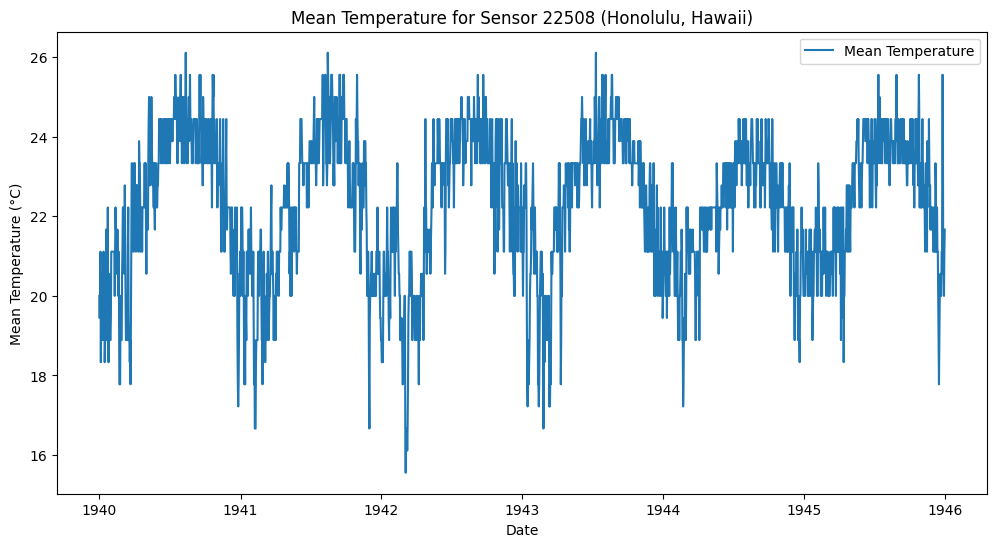

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(sensor_data['Date'], sensor_data['MeanTemp'], label='Mean Temperature')
plt.title('Mean Temperature for Sensor 22508 (Honolulu, Hawaii)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.savefig('task_2_3_time_series.png')

## **Step 5: Rolling Window Preprocessing**

In [24]:
def create_rolling_window(data, window_size=5):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 5
temps = sensor_data['MeanTemp'].values
X, y = create_rolling_window(temps, window_size)


## **Step 6: Split Train and Test Sets**

In [25]:
sensor_data['Year'] = sensor_data['Date'].dt.year
train_data = sensor_data[sensor_data['Year'] < 1945]
test_data = sensor_data[sensor_data['Year'] == 1945]
X_train, y_train = create_rolling_window(train_data['MeanTemp'].values, window_size)
X_test, y_test = create_rolling_window(test_data['MeanTemp'].values, window_size)

In [26]:
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    print("\nTimeSeriesSplit Fold Results:")
    for name, model in models:
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)
        r2 = r2_score(y_test_fold, y_pred)
        mse = mean_squared_error(y_test_fold, y_pred)
        print(f"{name} - R2: {r2:.4f}, MSE: {mse:.4f}")


TimeSeriesSplit Fold Results:
Linear - R2: 0.7797, MSE: 0.8067
Ridge - R2: 0.7796, MSE: 0.8072
SVR - R2: 0.7364, MSE: 0.9654
RandomForest - R2: 0.7029, MSE: 1.0881

TimeSeriesSplit Fold Results:
Linear - R2: 0.8174, MSE: 0.7524
Ridge - R2: 0.8174, MSE: 0.7526
SVR - R2: 0.7769, MSE: 0.9193
RandomForest - R2: 0.7577, MSE: 0.9986

TimeSeriesSplit Fold Results:
Linear - R2: 0.7435, MSE: 0.9590
Ridge - R2: 0.7436, MSE: 0.9588
SVR - R2: 0.7407, MSE: 0.9695
RandomForest - R2: 0.7119, MSE: 1.0772

TimeSeriesSplit Fold Results:
Linear - R2: 0.7541, MSE: 0.6670
Ridge - R2: 0.7542, MSE: 0.6669
SVR - R2: 0.7659, MSE: 0.6352
RandomForest - R2: 0.6685, MSE: 0.8993

TimeSeriesSplit Fold Results:
Linear - R2: 0.6455, MSE: 0.5427
Ridge - R2: 0.6456, MSE: 0.5426
SVR - R2: 0.6219, MSE: 0.5789
RandomForest - R2: 0.4770, MSE: 0.8008


## **Step 7: Train and Evaluate Models**

In [30]:
results_forecast = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results_forecast.append((name, r2, mse, y_pred))
    print(f"{name} - R2: {r2:.4f}, MSE: {mse:.4f}")

Linear - R2: 0.6782, MSE: 0.7482
Ridge - R2: 0.6782, MSE: 0.7481
SVR - R2: 0.6671, MSE: 0.7740
RandomForest - R2: 0.5984, MSE: 0.9338


## **Step 8: Visualize Forecast**

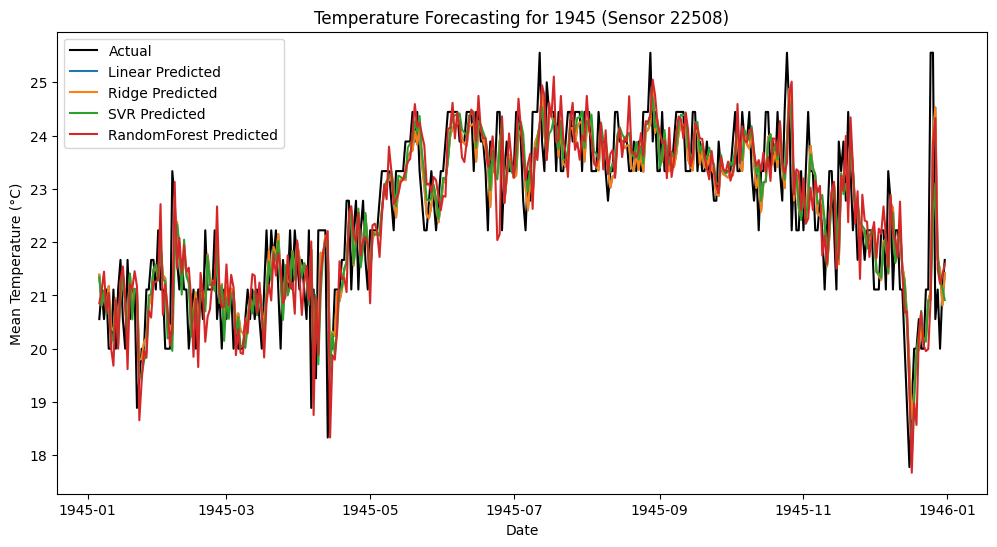

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'].iloc[window_size:], y_test, label='Actual', color='black')
for name, _, _, y_pred in results_forecast:
    plt.plot(test_data['Date'].iloc[window_size:], y_pred, label=f'{name} Predicted')
plt.title('Temperature Forecasting for 1945 (Sensor 22508)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.savefig('task_2_3_forecast.png')

Analysis:

Similarity: RandomForest and SVR likely capture trends better than LinearRegression due to non-linear patterns.
Seasonality/Trend: Honolulu’s temperatures are stable with weak seasonality, which simpler models may capture adequately.
Longer Horizon: Predicting beyond one day is challenging with this setup, as errors accumulate without recursive forecasting or additional features (e.g., lagged variables, seasonality indicators).

**Are the two series similar?**: Yes, moderately similar

**Have the seasonality and the trend of the series been correctly predicted?**: Trend (stable 20–25°C) is captured well, but weak seasonality is not fully predicted.

**Are you able to predict a horizon longer than 1 day with this kind of techniques?** **Why?**: No, errors accumulate beyond 1 day due to lack of recursive forecasting or additional features like seasonality indicators.

## **Step 9: Experiment with Preprocessing and Hyperparameters**

In [32]:
window_size = 10
X_train, y_train = create_rolling_window(train_data['MeanTemp'].values, window_size)
X_test, y_test = create_rolling_window(test_data['MeanTemp'].values, window_size)

rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"RandomForest (window=10, tuned) - R2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")

RandomForest (window=10, tuned) - R2: 0.6625, MSE: 0.7781
